In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [16]:
df = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [18]:
df=df.interpolate(method = 'spline', order = 2)

In [19]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

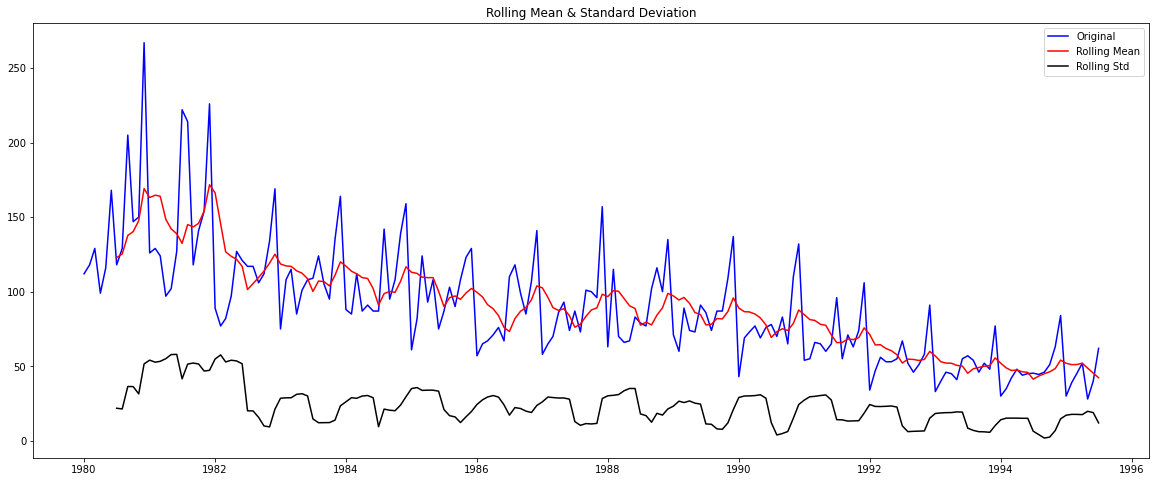

Results of Dickey-Fuller Test:
Test Statistic                  -1.873307
p-value                          0.344721
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [20]:
test_stationarity(df['Rose'])

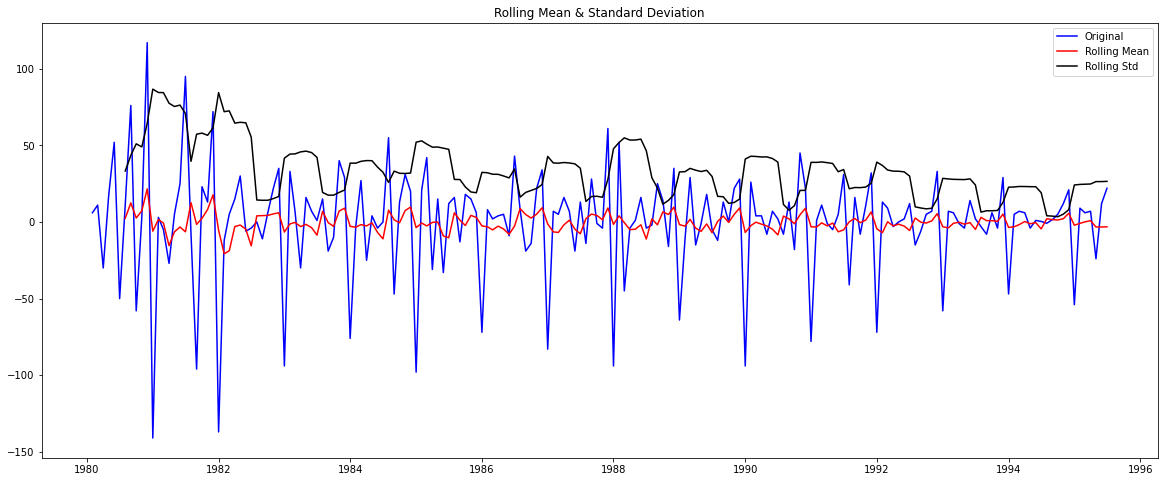

Results of Dickey-Fuller Test:
Test Statistic                -8.044136e+00
p-value                        1.813615e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [21]:
test_stationarity(df['Rose'].diff().dropna())

In [25]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

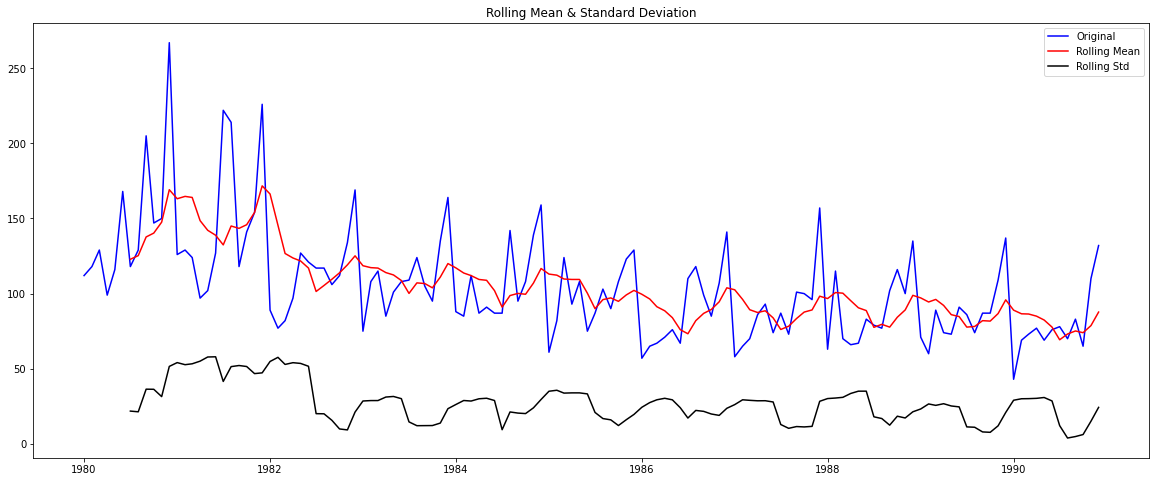

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [26]:
test_stationarity(train['Rose'])

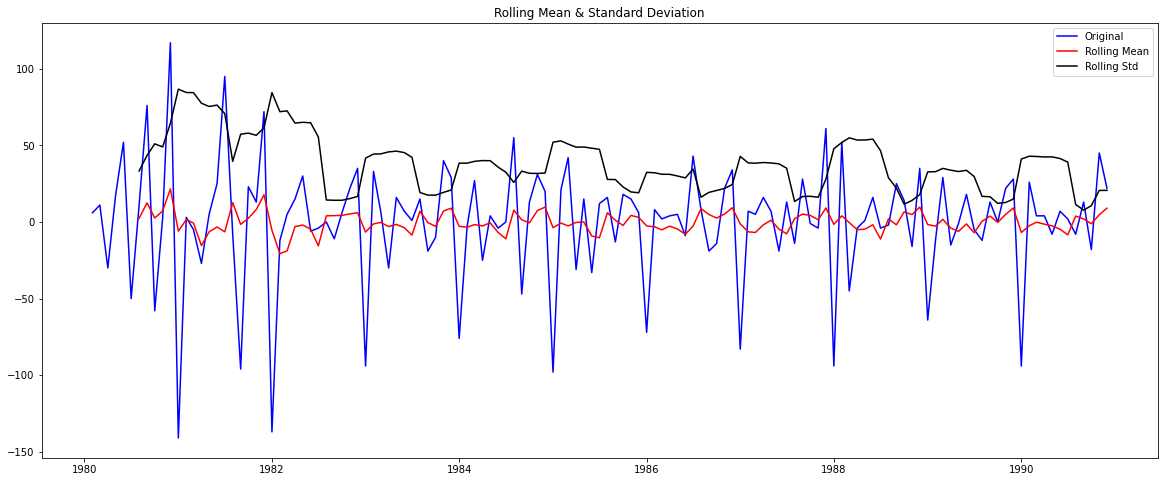

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [24]:
test_stationarity(train['Rose'].diff().dropna())

In [27]:
import itertools
p = q = range(0, 4) #p=0,1,2,3=q
d= range(1,2) #d=1
pdq = list(itertools.product(p, d, q))

In [28]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535765
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231897
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.5078621868424
ARIMA(2, 1, 2) - AIC:1281.8707222264402


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.6953561209548
ARIMA(3, 1, 0) - AIC:1297.4810917271725
ARIMA(3, 1, 1) - AIC:1282.4192776271946
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.6619652725685


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 3)",1274.695356
15,"(3, 1, 3)",1278.661965
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.574230
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722
1,"(0, 1, 1)",1282.309832


In [30]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 08 Jan 2022   AIC                           1274.695
Time:                        21:53:44   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.992      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.684      0.000      -0.893      -0.564
ma.L1          1.0446      0.628      1.665      0.0

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Predict on the Test Set using this model and evaluate the model.

In [31]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [32]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

36.837007276109375


In [34]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,3)'])

resultsDf

,RMSE
"ARIMA(2,1,3)",36.837007


In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

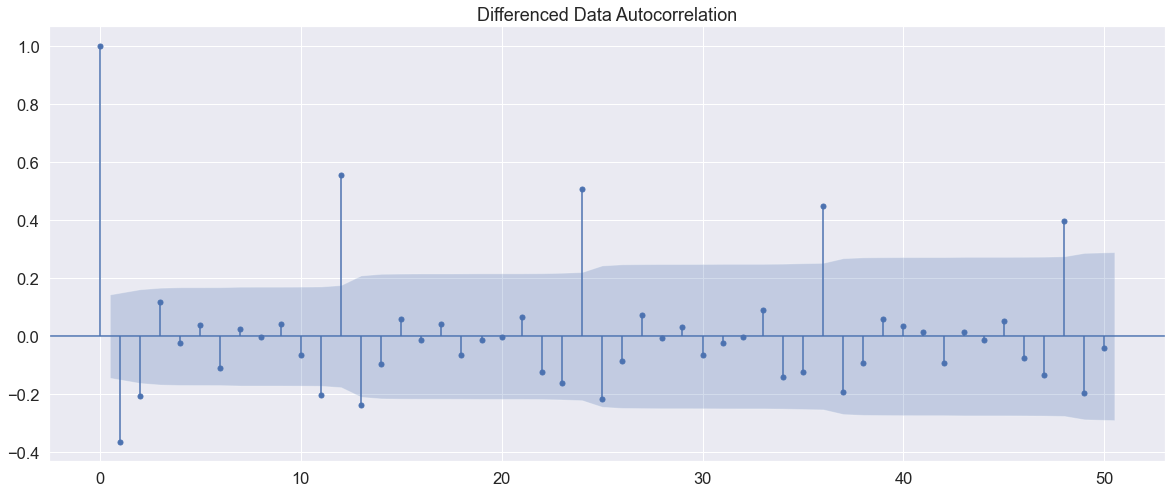

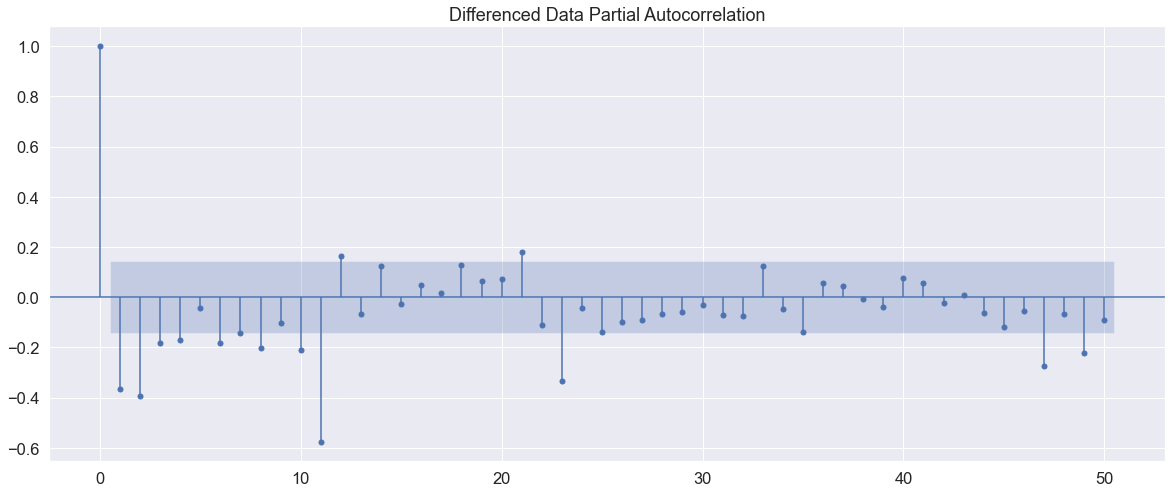

In [40]:
sns.set(font_scale=1.5)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()
sns.set(font_scale=1.0)

In [41]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Sat, 08 Jan 2022   AIC                           1285.718
Time:                        22:04:55   BIC                           1305.845
Sample:                    01-01-1980   HQIC                          1293.896
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


## Predict on the Test Set using this model and evaluate the model.

In [42]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [43]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse)

37.06120223975309


In [44]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,3)",36.837007
"ARIMA(4,1,2)",37.061202


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

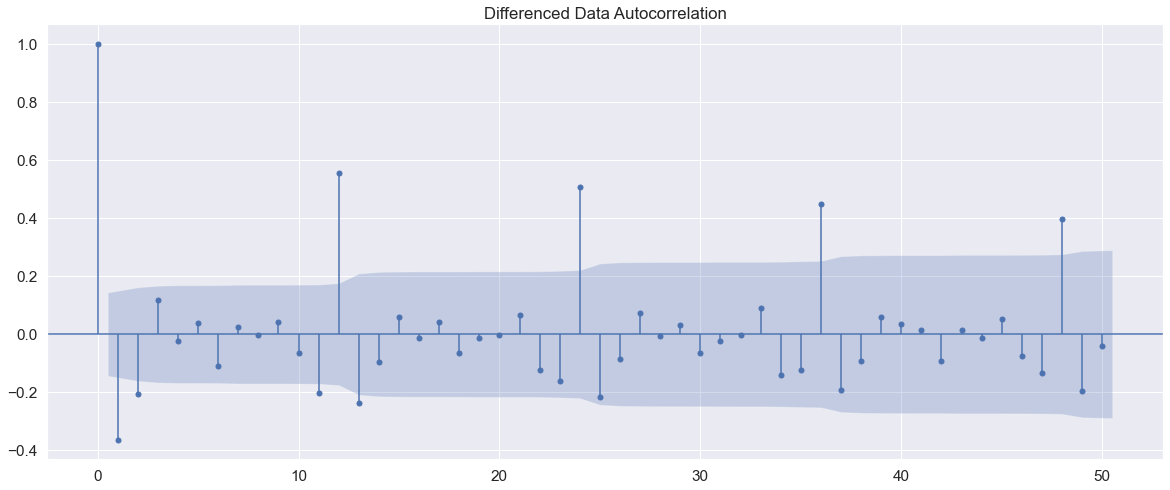

In [45]:
sns.set(font_scale=1.4)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()
sns.set(font_scale=1.0)

In [52]:
import itertools
p = q = range(0, 6)
q = range(0, 4)
d= range(1,2) #d=1
D = range(0,2) #D=0,1
#P=Q=range(0,3)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))] #P,D,Q

In [53]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [54]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207386
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380903


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3994.7201928422214
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.505730164378
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776131


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:2967.837130084718
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385767
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635754913
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3801.0056501147847
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658809
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601609
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654717


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3181.742327994016
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945715


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:5644.471437825422
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374412
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729143485
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244223457


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:2264.962406665594
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702714087
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127778


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3843.9094675774722
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:752.39581227398
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:748.316524649097
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:748.9721713401693
SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:2702.9923787259922
SARIMA(0, 1, 0)x(4, 0, 0, 12) - AIC:748.8474725386055
SARIMA(0, 1, 0)x(4, 0, 1, 12) - AIC:748.3817066901196
SARIMA(0, 1, 0)x(4, 0, 2, 12) - AIC:748.5912491654486


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(4, 0, 3, 12) - AIC:2385.25906395511
SARIMA(0, 1, 0)x(4, 1, 0, 12) - AIC:642.292981107266
SARIMA(0, 1, 0)x(4, 1, 1, 12) - AIC:643.6597614091374
SARIMA(0, 1, 0)x(4, 1, 2, 12) - AIC:645.630197236591
SARIMA(0, 1, 0)x(4, 1, 3, 12) - AIC:2697.21037055282
SARIMA(0, 1, 0)x(5, 0, 0, 12) - AIC:636.5692287068175
SARIMA(0, 1, 0)x(5, 0, 1, 12) - AIC:637.4841290704486
SARIMA(0, 1, 0)x(5, 0, 2, 12) - AIC:639.3083625406483
SARIMA(0, 1, 0)x(5, 0, 3, 12) - AIC:2704.834912276505
SARIMA(0, 1, 0)x(5, 1, 0, 12) - AIC:531.5175987725132
SARIMA(0, 1, 0)x(5, 1, 1, 12) - AIC:533.2473949325841
SARIMA(0, 1, 0)x(5, 1, 2, 12) - AIC:535.1411508158171


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(5, 1, 3, 12) - AIC:1913.1138584125974
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383913


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3812.2263068724546
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133562082
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717843
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809267121


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:3200.589215129686
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918096
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947592
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483300271


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3442.2711593212944
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655530342
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520092
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670346244


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:144.9030791622591
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536011
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461668
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260106638
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:5109.0038825184365
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350158656
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555753766124
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.1538715117415


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:3336.3125618819745
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764816959
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844932689858
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269370274


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3496.1791831541277
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:708.0834235877855
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:699.7496865196659
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:701.2070503129079
SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3292.079535445334
SARIMA(0, 1, 1)x(4, 0, 0, 12) - AIC:703.2867140511253
SARIMA(0, 1, 1)x(4, 0, 1, 12) - AIC:701.5547219276308
SARIMA(0, 1, 1)x(4, 0, 2, 12) - AIC:701.3315550600865


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(4, 0, 3, 12) - AIC:3103.9557718937026
SARIMA(0, 1, 1)x(4, 1, 0, 12) - AIC:607.1294889049201
SARIMA(0, 1, 1)x(4, 1, 1, 12) - AIC:606.3920460563628
SARIMA(0, 1, 1)x(4, 1, 2, 12) - AIC:603.8266627659132


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(4, 1, 3, 12) - AIC:2669.0115800563317
SARIMA(0, 1, 1)x(5, 0, 0, 12) - AIC:602.4313990037954
SARIMA(0, 1, 1)x(5, 0, 1, 12) - AIC:603.4121052562488
SARIMA(0, 1, 1)x(5, 0, 2, 12) - AIC:604.7055765927558


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(5, 0, 3, 12) - AIC:2627.7508149253254
SARIMA(0, 1, 1)x(5, 1, 0, 12) - AIC:497.36158318935657
SARIMA(0, 1, 1)x(5, 1, 1, 12) - AIC:498.6713363787898
SARIMA(0, 1, 1)x(5, 1, 2, 12) - AIC:500.24002979523334


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(5, 1, 3, 12) - AIC:2242.5794421518226
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054106
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264868
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617705


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4201.209217472669
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1098.6598024316877
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:904.5003488472469
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:784.0140955703869


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:3248.759747259705
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413757
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933547742
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913540886


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3899.6477299708827
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:941.5256923362678
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:915.2731134090627
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:785.8237144293408


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:89.11552382813285
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257976
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545051985
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085680304


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:4960.110503249995
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:811.5489438178314
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:805.1158488730321
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:774.9691201441359


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:2407.698520990237
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374651
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080534338
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528338119


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3557.243855130118
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:709.6122118422065
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:701.7009892590025
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:703.0331039503876


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:4168.264489407762
SARIMA(0, 1, 2)x(4, 0, 0, 12) - AIC:704.8298249218113
SARIMA(0, 1, 2)x(4, 0, 1, 12) - AIC:703.497313332905
SARIMA(0, 1, 2)x(4, 0, 2, 12) - AIC:703.2885803030659


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(4, 0, 3, 12) - AIC:2123.3969590748598
SARIMA(0, 1, 2)x(4, 1, 0, 12) - AIC:609.0055273868311
SARIMA(0, 1, 2)x(4, 1, 1, 12) - AIC:608.3621444623674
SARIMA(0, 1, 2)x(4, 1, 2, 12) - AIC:607.3335680247291


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(4, 1, 3, 12) - AIC:20.0
SARIMA(0, 1, 2)x(5, 0, 0, 12) - AIC:604.1582455266906
SARIMA(0, 1, 2)x(5, 0, 1, 12) - AIC:605.348866846442
SARIMA(0, 1, 2)x(5, 0, 2, 12) - AIC:606.6983693958289


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(5, 0, 3, 12) - AIC:1453.4694346213696
SARIMA(0, 1, 2)x(5, 1, 0, 12) - AIC:498.7201425288583
SARIMA(0, 1, 2)x(5, 1, 1, 12) - AIC:497.90757275220506
SARIMA(0, 1, 2)x(5, 1, 2, 12) - AIC:499.58618495014196


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(5, 1, 3, 12) - AIC:22.0
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739109
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.763264607837
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380675
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:2831.37825742173
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1088.376471013649
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:897.131787389288
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:778.4427567866366


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:3786.4700150902513
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136121227
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212934789
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523341046
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3622.955941170985
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:943.5043088714334
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:904.9319970114584
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:780.2386079740921


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:1333.8661612190244
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.947710898705
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996903726
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788253869


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:4884.1980211375085
SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:813.4051893208972
SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:806.4667725223984
SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:767.2243745742168


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:3871.642658351335
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124799054
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772318107
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150754367635


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:4139.025652849179
SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:711.7218300804425
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:703.6693202860646
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:705.3784447931728


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:3188.9076819816687
SARIMA(0, 1, 3)x(4, 0, 0, 12) - AIC:706.7844727863862
SARIMA(0, 1, 3)x(4, 0, 1, 12) - AIC:705.4956441456036
SARIMA(0, 1, 3)x(4, 0, 2, 12) - AIC:705.2607164028373


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(4, 0, 3, 12) - AIC:2556.015502274017
SARIMA(0, 1, 3)x(4, 1, 0, 12) - AIC:611.0019409809943
SARIMA(0, 1, 3)x(4, 1, 1, 12) - AIC:609.8314854894008
SARIMA(0, 1, 3)x(4, 1, 2, 12) - AIC:608.977496776152


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(4, 1, 3, 12) - AIC:3144.532889545465
SARIMA(0, 1, 3)x(5, 0, 0, 12) - AIC:605.8067675890112
SARIMA(0, 1, 3)x(5, 0, 1, 12) - AIC:607.1126398604852
SARIMA(0, 1, 3)x(5, 0, 2, 12) - AIC:608.351491885356


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(5, 0, 3, 12) - AIC:2311.0109954791833
SARIMA(0, 1, 3)x(5, 1, 0, 12) - AIC:500.41536551305626
SARIMA(0, 1, 3)x(5, 1, 1, 12) - AIC:499.019419753596
SARIMA(0, 1, 3)x(5, 1, 2, 12) - AIC:500.66787202543253
SARIMA(0, 1, 3)x(5, 1, 3, 12) - AIC:2430.330982842485
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.295544758571
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.940539125769


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3687.3028788822576
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1164.5103013842013
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:953.8813887547439
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:828.839883282132


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:3384.9933034395813
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804594
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055025245
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948505


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3193.2841246115745
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:962.9698535736063
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:964.8516934823651
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:830.3075804966375
SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:5774.8441176203105
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664086
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661069
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071439


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:5814.341704608377
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:826.9995808091127
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:823.8261102782959
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:825.0437253085973


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:3518.539453403109
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272404
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.150137157357
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305087588576


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3276.5613357502853
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:727.3669084127101
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:728.903469043924
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:721.9926158573575


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:3538.354365178373
SARIMA(1, 1, 0)x(4, 0, 0, 12) - AIC:722.8829882610344
SARIMA(1, 1, 0)x(4, 0, 1, 12) - AIC:719.8954160827702
SARIMA(1, 1, 0)x(4, 0, 2, 12) - AIC:720.3004359645025


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(4, 0, 3, 12) - AIC:2886.331795224739
SARIMA(1, 1, 0)x(4, 1, 0, 12) - AIC:618.0184599845463
SARIMA(1, 1, 0)x(4, 1, 1, 12) - AIC:618.7590792978311
SARIMA(1, 1, 0)x(4, 1, 2, 12) - AIC:620.7412164447115


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(4, 1, 3, 12) - AIC:2856.452484577746
SARIMA(1, 1, 0)x(5, 0, 0, 12) - AIC:611.0880671830074
SARIMA(1, 1, 0)x(5, 0, 1, 12) - AIC:610.7032269527529
SARIMA(1, 1, 0)x(5, 0, 2, 12) - AIC:612.6284851716589


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(5, 0, 3, 12) - AIC:2435.2906026361675
SARIMA(1, 1, 0)x(5, 1, 0, 12) - AIC:506.6881384394146
SARIMA(1, 1, 0)x(5, 1, 1, 12) - AIC:506.35582545782836
SARIMA(1, 1, 0)x(5, 1, 2, 12) - AIC:508.26230780177644


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(5, 1, 3, 12) - AIC:1905.756433287536
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255503
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640711
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063865


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3866.3309565212207
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1110.6209464400056
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:914.045384498808
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:792.3411370856546
SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:3279.91983409821
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031155
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547134137
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428499555


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3421.8454124678997
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:933.2974216823696
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:927.2920638200452
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:794.1929706684577


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:243.41438447005413
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060839028
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470778
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593682


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:4969.166150017314
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:799.9474258320881
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:791.9065436334079
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:783.8990945878464
SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3331.04648352363
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439381729
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447841288
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850312013


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3424.498567370377
SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:702.1669809953612
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:693.9370824544633
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:695.0475172664666


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:3626.7491192821126
SARIMA(1, 1, 1)x(4, 0, 0, 12) - AIC:696.9134745335123
SARIMA(1, 1, 1)x(4, 0, 1, 12) - AIC:694.6873849849108
SARIMA(1, 1, 1)x(4, 0, 2, 12) - AIC:695.8952847039051
SARIMA(1, 1, 1)x(4, 0, 3, 12) - AIC:2889.512048881577
SARIMA(1, 1, 1)x(4, 1, 0, 12) - AIC:600.6677757400183
SARIMA(1, 1, 1)x(4, 1, 1, 12) - AIC:600.9614067607557
SARIMA(1, 1, 1)x(4, 1, 2, 12) - AIC:597.8833542383759


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(4, 1, 3, 12) - AIC:4643.105575213386
SARIMA(1, 1, 1)x(5, 0, 0, 12) - AIC:595.7707971671628
SARIMA(1, 1, 1)x(5, 0, 1, 12) - AIC:596.6127119193828
SARIMA(1, 1, 1)x(5, 0, 2, 12) - AIC:598.55536447436


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(5, 0, 3, 12) - AIC:2722.7176421681893
SARIMA(1, 1, 1)x(5, 1, 0, 12) - AIC:491.03567749382296
SARIMA(1, 1, 1)x(5, 1, 1, 12) - AIC:490.22987392152186
SARIMA(1, 1, 1)x(5, 1, 2, 12) - AIC:491.1166109106548
SARIMA(1, 1, 1)x(5, 1, 3, 12) - AIC:1525.7392479720997
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706227
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101027
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402687189
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3447.2927509326205
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1096.3571024949918
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:906.4966907625248
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:785.9832738671731
SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:3055.9301285107827
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760928442033
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211327557
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500582871


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3281.518299232673
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:934.8870392437872
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:917.2527818408075
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:787.7843970222305


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:1479.111540727702
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196656119
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827969797
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.8717668633517


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4893.62626496279
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:801.9382052143811
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:791.9171139250981
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:776.9401151792707
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3277.0214748070794
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801474945
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805905303
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390256921943
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3418.3070653847926
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:703.8075522594689
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:696.1085677313125
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:697.2354670556556


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:1658.9146403326552
SARIMA(1, 1, 2)x(4, 0, 0, 12) - AIC:698.7703965177407
SARIMA(1, 1, 2)x(4, 0, 1, 12) - AIC:696.5373690769375
SARIMA(1, 1, 2)x(4, 0, 2, 12) - AIC:697.8846047840195


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(4, 0, 3, 12) - AIC:3094.499037705222
SARIMA(1, 1, 2)x(4, 1, 0, 12) - AIC:600.4625339838063
SARIMA(1, 1, 2)x(4, 1, 1, 12) - AIC:601.2440250481443
SARIMA(1, 1, 2)x(4, 1, 2, 12) - AIC:599.8664138427423


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(4, 1, 3, 12) - AIC:22.0
SARIMA(1, 1, 2)x(5, 0, 0, 12) - AIC:600.8974507500334
SARIMA(1, 1, 2)x(5, 0, 1, 12) - AIC:602.0035827169714
SARIMA(1, 1, 2)x(5, 0, 2, 12) - AIC:600.0529848809747


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(5, 0, 3, 12) - AIC:2617.285678175667
SARIMA(1, 1, 2)x(5, 1, 0, 12) - AIC:483.5178015562166
SARIMA(1, 1, 2)x(5, 1, 1, 12) - AIC:484.75924961775826
SARIMA(1, 1, 2)x(5, 1, 2, 12) - AIC:486.3307014988472
SARIMA(1, 1, 2)x(5, 1, 3, 12) - AIC:24.0
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.546312531617
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849740065406
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105101109


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3545.3779100692022
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1088.0914860029723
SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:895.9867971267337
SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:780.3059561910892


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:2771.5034840862
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487675933
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950928680253
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232302947584
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3798.4228690322643
SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:936.6664092075843
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:906.7653660394104
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:782.1027704581354
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:18.0
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687610341547
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955660093145
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886592391202


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:4881.4912336111565
SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:803.661620720247
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:793.9162133189362
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:767.4753542781114


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:3162.9085962539057
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903136093145
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140235927
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467934005594


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3063.924872958354
SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:702.934308866081
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:696.4191782810731
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:698.0867416889901


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:312.16021802719285
SARIMA(1, 1, 3)x(4, 0, 0, 12) - AIC:700.6014489921245
SARIMA(1, 1, 3)x(4, 0, 1, 12) - AIC:698.5369224655709
SARIMA(1, 1, 3)x(4, 0, 2, 12) - AIC:699.8629400627195


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(4, 0, 3, 12) - AIC:3147.059347543599
SARIMA(1, 1, 3)x(4, 1, 0, 12) - AIC:602.3723450227487
SARIMA(1, 1, 3)x(4, 1, 1, 12) - AIC:602.9890629940651
SARIMA(1, 1, 3)x(4, 1, 2, 12) - AIC:603.1990029929656


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(4, 1, 3, 12) - AIC:24.0
SARIMA(1, 1, 3)x(5, 0, 0, 12) - AIC:601.4152752718753
SARIMA(1, 1, 3)x(5, 0, 1, 12) - AIC:603.0632203115523
SARIMA(1, 1, 3)x(5, 0, 2, 12) - AIC:601.5969816260872


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(5, 0, 3, 12) - AIC:2921.125274386753
SARIMA(1, 1, 3)x(5, 1, 0, 12) - AIC:492.73397188638
SARIMA(1, 1, 3)x(5, 1, 1, 12) - AIC:491.1617485601864
SARIMA(1, 1, 3)x(5, 1, 2, 12) - AIC:493.08856114532944


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(5, 1, 3, 12) - AIC:2393.677058076909
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471144
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829961


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3850.278511402389
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1133.2467704396645
SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:949.5332566880415
SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:827.1933387102574


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:3240.406265403574
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575926
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641096
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559131


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3460.241207015586
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:950.2637728230156
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:952.2623518887166
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:828.719870094184
SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:5754.5111222554115
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645493
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384188
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280802


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:5729.356278396099
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:814.2969261794736
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:808.510091494271
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:810.0074804176695


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:3210.097911204131
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407409111
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.047263790302
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372861


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3274.318408499404
SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:714.7788976437362
SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:705.0868021423696
SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:707.1846915308994
SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:3267.322840593802
SARIMA(2, 1, 0)x(4, 0, 0, 12) - AIC:711.0327682457668
SARIMA(2, 1, 0)x(4, 0, 1, 12) - AIC:708.1677071801282
SARIMA(2, 1, 0)x(4, 0, 2, 12) - AIC:708.0565138769769


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(4, 0, 3, 12) - AIC:3116.762427682118
SARIMA(2, 1, 0)x(4, 1, 0, 12) - AIC:601.0409788948085
SARIMA(2, 1, 0)x(4, 1, 1, 12) - AIC:601.8277398155305
SARIMA(2, 1, 0)x(4, 1, 2, 12) - AIC:603.4015296030848
SARIMA(2, 1, 0)x(4, 1, 3, 12) - AIC:2697.5540308732952
SARIMA(2, 1, 0)x(5, 0, 0, 12) - AIC:595.8807960323675
SARIMA(2, 1, 0)x(5, 0, 1, 12) - AIC:597.4772842734966
SARIMA(2, 1, 0)x(5, 0, 2, 12) - AIC:599.1484187876381


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(5, 0, 3, 12) - AIC:2424.9723154351045
SARIMA(2, 1, 0)x(5, 1, 0, 12) - AIC:492.3768036911895
SARIMA(2, 1, 0)x(5, 1, 1, 12) - AIC:492.80657117662713
SARIMA(2, 1, 0)x(5, 1, 2, 12) - AIC:494.79248377316907
SARIMA(2, 1, 0)x(5, 1, 3, 12) - AIC:2166.50375468317
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231801497
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949383
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472071325
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3223.9962179262916
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1107.1166362359763
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:915.1236479111577
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:794.27996262775


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:3020.0829253229185
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101435
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471208533
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822848
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3877.6344414832647
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:926.319703626804
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:928.3197020908623
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:796.1300001391998
SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:5688.241386051832
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608196617
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369554
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286412


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:4966.510727683186
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:792.8940753934386
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.892805137669
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335673745698
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3540.205976280984
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600253445
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258932856
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.059888726936


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:4132.35000275565
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:694.938675237918
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:687.9965335527877
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:688.9098639005007
SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:4193.271464388054
SARIMA(2, 1, 1)x(4, 0, 0, 12) - AIC:690.6446842705634
SARIMA(2, 1, 1)x(4, 0, 1, 12) - AIC:690.0221239127874
SARIMA(2, 1, 1)x(4, 0, 2, 12) - AIC:690.3782229393242


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(4, 0, 3, 12) - AIC:2769.7856676806873
SARIMA(2, 1, 1)x(4, 1, 0, 12) - AIC:591.4846846116255
SARIMA(2, 1, 1)x(4, 1, 1, 12) - AIC:593.32436246097
SARIMA(2, 1, 1)x(4, 1, 2, 12) - AIC:594.1662407488982


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(4, 1, 3, 12) - AIC:283.30651732291653
SARIMA(2, 1, 1)x(5, 0, 0, 12) - AIC:587.530037761633
SARIMA(2, 1, 1)x(5, 0, 1, 12) - AIC:588.5235164769767
SARIMA(2, 1, 1)x(5, 0, 2, 12) - AIC:590.3140463007737


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(5, 0, 3, 12) - AIC:3126.0838692147627
SARIMA(2, 1, 1)x(5, 1, 0, 12) - AIC:484.53589462640537
SARIMA(2, 1, 1)x(5, 1, 1, 12) - AIC:483.73227384660083
SARIMA(2, 1, 1)x(5, 1, 2, 12) - AIC:485.33863346673735


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(5, 1, 3, 12) - AIC:98.40954079984728
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.910211614668
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259822
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311126987
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3173.847450733612
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.4823964822172
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:904.7004130396713
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:784.1409458340048
SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:3241.219579495557
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713695268
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353605251
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488806784


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2967.753768577894
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3705667113645
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:915.6932508584204
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:785.8280645177034


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:1084.8535437827697
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.346444113502
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781888984845
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981296392


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:5032.767562276918
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.7799442939382
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:783.703652268994
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:776.9961016146897


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:3336.8964674542904
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712862525
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035436831
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640502913844


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3771.513124361352
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:696.8666403428413
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:688.2483991891179
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:689.7855633891752


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:493.30289161725256
SARIMA(2, 1, 2)x(4, 0, 0, 12) - AIC:692.4596854343489
SARIMA(2, 1, 2)x(4, 0, 1, 12) - AIC:691.6930189382269
SARIMA(2, 1, 2)x(4, 0, 2, 12) - AIC:692.3428760681246


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(4, 0, 3, 12) - AIC:2749.086641470987
SARIMA(2, 1, 2)x(4, 1, 0, 12) - AIC:591.4530932949141
SARIMA(2, 1, 2)x(4, 1, 1, 12) - AIC:594.7563453410198
SARIMA(2, 1, 2)x(4, 1, 2, 12) - AIC:590.9449208508631


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(4, 1, 3, 12) - AIC:24.0
SARIMA(2, 1, 2)x(5, 0, 0, 12) - AIC:587.4124261230664
SARIMA(2, 1, 2)x(5, 0, 1, 12) - AIC:589.3298188276162
SARIMA(2, 1, 2)x(5, 0, 2, 12) - AIC:591.2610752356845


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(5, 0, 3, 12) - AIC:2151.994635679567
SARIMA(2, 1, 2)x(5, 1, 0, 12) - AIC:476.9711522095011
SARIMA(2, 1, 2)x(5, 1, 1, 12) - AIC:485.6793352612162
SARIMA(2, 1, 2)x(5, 1, 2, 12) - AIC:487.2937116057666


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(5, 1, 3, 12) - AIC:625.9707052881507
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8703308689642
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073334709416
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349290735613


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3769.209792815469
SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1089.536865571591
SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:897.1805259111162
SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:779.1301959275132


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:3140.011960561758
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563352485342
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0461969647677
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483353878106


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:4296.205884682063
SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:919.0020068859704
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:902.2459021899501
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:780.6508317415029


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:20.0
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301543576
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.232806141173
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191807630987


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:5097.3399180387705
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:792.2339221912413
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:787.7533252042398
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:769.4962097904455


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:3238.4494888690074
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074208074042
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101470184364
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452495120315


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3341.064176888744
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:694.5858505384219
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:691.0770835344656
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:692.324988400432


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:3307.9235596857106
SARIMA(2, 1, 3)x(4, 0, 0, 12) - AIC:688.5833027344039
SARIMA(2, 1, 3)x(4, 0, 1, 12) - AIC:689.4996641117906
SARIMA(2, 1, 3)x(4, 0, 2, 12) - AIC:690.3364314021419


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(4, 0, 3, 12) - AIC:2973.1886541289723
SARIMA(2, 1, 3)x(4, 1, 0, 12) - AIC:593.1301848981116
SARIMA(2, 1, 3)x(4, 1, 1, 12) - AIC:593.7017882212803
SARIMA(2, 1, 3)x(4, 1, 2, 12) - AIC:592.9399167417033


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(4, 1, 3, 12) - AIC:173.60574829008002
SARIMA(2, 1, 3)x(5, 0, 0, 12) - AIC:589.6232360857304
SARIMA(2, 1, 3)x(5, 0, 1, 12) - AIC:591.0477261556913
SARIMA(2, 1, 3)x(5, 0, 2, 12) - AIC:592.9478208090493


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(5, 0, 3, 12) - AIC:2589.098710211287
SARIMA(2, 1, 3)x(5, 1, 0, 12) - AIC:478.5111761216542
SARIMA(2, 1, 3)x(5, 1, 1, 12) - AIC:485.3625693607852
SARIMA(2, 1, 3)x(5, 1, 2, 12) - AIC:487.0438096119509
SARIMA(2, 1, 3)x(5, 1, 3, 12) - AIC:2153.7914655750624
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042233
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118006
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3856.9843752042702
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1119.1809056018983
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:943.5417009331105
SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:822.4469311120079


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:2828.998068192689
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456725728
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783342
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304789
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3785.4526696114444
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:930.694314601826
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:932.49014969597
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:824.1779575729853


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:3970.6123154831207
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197907098
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976515
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472921
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:5513.285760736789
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:803.7674514642811
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:794.8634035234377
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:796.6369790760286


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:2877.952085396227
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701528664
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661984
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017169421


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3342.991871978492
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:704.8546570596723
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:696.8642292298704
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:698.7361273230167
SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:3033.7110266245236
SARIMA(3, 1, 0)x(4, 0, 0, 12) - AIC:701.7292064569071
SARIMA(3, 1, 0)x(4, 0, 1, 12) - AIC:698.2195659178623
SARIMA(3, 1, 0)x(4, 0, 2, 12) - AIC:700.2068508008012


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(4, 0, 3, 12) - AIC:2232.817063962654
SARIMA(3, 1, 0)x(4, 1, 0, 12) - AIC:592.8066053979073
SARIMA(3, 1, 0)x(4, 1, 1, 12) - AIC:593.1161487092452
SARIMA(3, 1, 0)x(4, 1, 2, 12) - AIC:593.2112486743472


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(4, 1, 3, 12) - AIC:2755.6893987594135
SARIMA(3, 1, 0)x(5, 0, 0, 12) - AIC:589.0076032966354
SARIMA(3, 1, 0)x(5, 0, 1, 12) - AIC:590.5938807403526
SARIMA(3, 1, 0)x(5, 0, 2, 12) - AIC:590.9679538961881


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(5, 0, 3, 12) - AIC:2502.5628391881364
SARIMA(3, 1, 0)x(5, 1, 0, 12) - AIC:482.19355038908753
SARIMA(3, 1, 0)x(5, 1, 1, 12) - AIC:478.5843901785067
SARIMA(3, 1, 0)x(5, 1, 2, 12) - AIC:479.9172295695548


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(5, 1, 3, 12) - AIC:2621.6291146484123
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709336
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641238998
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547551
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3832.6486684749325
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1099.633086691603
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:915.5227261302208
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:795.1857811464895


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:2862.3684616226915
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.614913651354
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554269556
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384262
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3872.110925493171
SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:914.5580669316131
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:916.4809813444085
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:796.8065566401601


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:18.0
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459898217
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208537954
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523226816


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:5035.81003937405
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:785.3678771512988
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:777.3603964413818
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:777.5853448602467
SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:3361.631155599664
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990389883
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300792184
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.400285679646


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:4140.166945999869
SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:688.5642274589256
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:681.3628067026551
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:682.3206980837551


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:3249.589019047976
SARIMA(3, 1, 1)x(4, 0, 0, 12) - AIC:684.9972307277098
SARIMA(3, 1, 1)x(4, 0, 1, 12) - AIC:683.7410087837318
SARIMA(3, 1, 1)x(4, 0, 2, 12) - AIC:685.0110947193464


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(4, 0, 3, 12) - AIC:3076.4270163698307
SARIMA(3, 1, 1)x(4, 1, 0, 12) - AIC:585.4265841428298
SARIMA(3, 1, 1)x(4, 1, 1, 12) - AIC:586.1440693188393
SARIMA(3, 1, 1)x(4, 1, 2, 12) - AIC:583.6931057947875


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(4, 1, 3, 12) - AIC:24.0
SARIMA(3, 1, 1)x(5, 0, 0, 12) - AIC:583.2808687504884
SARIMA(3, 1, 1)x(5, 0, 1, 12) - AIC:584.1883937552332
SARIMA(3, 1, 1)x(5, 0, 2, 12) - AIC:585.9808057795794


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(5, 0, 3, 12) - AIC:3003.4542447906324
SARIMA(3, 1, 1)x(5, 1, 0, 12) - AIC:478.16172095322406
SARIMA(3, 1, 1)x(5, 1, 1, 12) - AIC:476.55441352569767
SARIMA(3, 1, 1)x(5, 1, 2, 12) - AIC:477.0903010798671
SARIMA(3, 1, 1)x(5, 1, 3, 12) - AIC:2786.0931507762493
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652270935
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401420966
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980112519722


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3877.1562168863343
SARIMA(3, 1, 2)x(0, 1, 0, 12) - AIC:1097.531777184974
SARIMA(3, 1, 2)x(0, 1, 1, 12) - AIC:906.5708111956585
SARIMA(3, 1, 2)x(0, 1, 2, 12) - AIC:787.9521879481096
SARIMA(3, 1, 2)x(0, 1, 3, 12) - AIC:3014.0996870299105
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211487903
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260517744263
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875121314783


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:4025.7945025150534
SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:915.605891403302
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:917.4091458336669
SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:789.5119881156364


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:1471.9485632763658
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3183840607726
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441194814
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1431301938173


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3441.1159109817686
SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:786.7471041588022
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:777.261617622554
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:778.7252770032263


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:3253.6257268690006
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505645846735
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462148333135
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809352713401
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3084.384023336879
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:687.9384845007127
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:683.2117008121626
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:684.014183640585


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:237.4981352902546
SARIMA(3, 1, 2)x(4, 0, 0, 12) - AIC:686.9734657305146
SARIMA(3, 1, 2)x(4, 0, 1, 12) - AIC:685.7388610031799
SARIMA(3, 1, 2)x(4, 0, 2, 12) - AIC:686.6692279348968
SARIMA(3, 1, 2)x(4, 0, 3, 12) - AIC:2879.766131621335
SARIMA(3, 1, 2)x(4, 1, 0, 12) - AIC:584.8744652400848
SARIMA(3, 1, 2)x(4, 1, 1, 12) - AIC:587.5781172589574
SARIMA(3, 1, 2)x(4, 1, 2, 12) - AIC:586.4863971529387
SARIMA(3, 1, 2)x(4, 1, 3, 12) - AIC:26.0
SARIMA(3, 1, 2)x(5, 0, 0, 12) - AIC:575.5230708425312
SARIMA(3, 1, 2)x(5, 0, 1, 12) - AIC:576.6362487290946
SARIMA(3, 1, 2)x(5, 0, 2, 12) - AIC:578.62685715655


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(5, 0, 3, 12) - AIC:2101.6041977200957
SARIMA(3, 1, 2)x(5, 1, 0, 12) - AIC:478.91317833276537
SARIMA(3, 1, 2)x(5, 1, 1, 12) - AIC:477.40831466949896
SARIMA(3, 1, 2)x(5, 1, 2, 12) - AIC:480.46615962287876


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(5, 1, 3, 12) - AIC:1992.2978196781282
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385925229419
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397683823371
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.334017177607


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:4194.85166432144
SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1090.436608848917
SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:899.4800705818188
SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:780.7435160601797


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:587.0219044005621
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8463763751492
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380907448
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483671004334


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2676.733549342201
SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:919.3449764884689
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:907.6982326678249
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:782.5626598804613
SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:576.7474179571914
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711793227
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217100869998
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714873026


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:5026.331931674906
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:785.2892834636724
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:777.7751580818655
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:770.2523446672743


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:599.3945231526982
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610185081821
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690409028603
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316169896598


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3412.6656981256183
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:689.5019316268842
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:681.6096055556241
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:681.971734583756


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:593.8024127696108
SARIMA(3, 1, 3)x(4, 0, 0, 12) - AIC:682.8677718945406
SARIMA(3, 1, 3)x(4, 0, 1, 12) - AIC:685.0969306416905
SARIMA(3, 1, 3)x(4, 0, 2, 12) - AIC:684.684427207995


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(4, 0, 3, 12) - AIC:3436.218853470193
SARIMA(3, 1, 3)x(4, 1, 0, 12) - AIC:586.839047842827
SARIMA(3, 1, 3)x(4, 1, 1, 12) - AIC:587.5958167037564
SARIMA(3, 1, 3)x(4, 1, 2, 12) - AIC:585.9221569869939


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(4, 1, 3, 12) - AIC:28.0
SARIMA(3, 1, 3)x(5, 0, 0, 12) - AIC:581.7467191929626
SARIMA(3, 1, 3)x(5, 0, 1, 12) - AIC:583.7463507543023
SARIMA(3, 1, 3)x(5, 0, 2, 12) - AIC:585.7447417439816


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(5, 0, 3, 12) - AIC:2703.3736631106553
SARIMA(3, 1, 3)x(5, 1, 0, 12) - AIC:470.3127307196401
SARIMA(3, 1, 3)x(5, 1, 1, 12) - AIC:475.67855704478256
SARIMA(3, 1, 3)x(5, 1, 2, 12) - AIC:481.8622904563425


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(5, 1, 3, 12) - AIC:30.0
SARIMA(4, 1, 0)x(0, 0, 0, 12) - AIC:1259.7595579290048
SARIMA(4, 1, 0)x(0, 0, 1, 12) - AIC:1115.4809902316667
SARIMA(4, 1, 0)x(0, 0, 2, 12) - AIC:948.7254674674552


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(0, 0, 3, 12) - AIC:3729.7744922876504
SARIMA(4, 1, 0)x(0, 1, 0, 12) - AIC:1102.6693057200832
SARIMA(4, 1, 0)x(0, 1, 1, 12) - AIC:935.8301129258169
SARIMA(4, 1, 0)x(0, 1, 2, 12) - AIC:817.9185794372353


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(0, 1, 3, 12) - AIC:3574.1655626129336
SARIMA(4, 1, 0)x(1, 0, 0, 12) - AIC:1066.3729654556394
SARIMA(4, 1, 0)x(1, 0, 1, 12) - AIC:1048.8857761018503
SARIMA(4, 1, 0)x(1, 0, 2, 12) - AIC:936.7499176524176


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(1, 0, 3, 12) - AIC:4091.3869771593513
SARIMA(4, 1, 0)x(1, 1, 0, 12) - AIC:913.5069542975807
SARIMA(4, 1, 0)x(1, 1, 1, 12) - AIC:906.320791957955
SARIMA(4, 1, 0)x(1, 1, 2, 12) - AIC:819.5864868903798
SARIMA(4, 1, 0)x(1, 1, 3, 12) - AIC:5753.514546437071
SARIMA(4, 1, 0)x(2, 0, 0, 12) - AIC:892.3611447175215
SARIMA(4, 1, 0)x(2, 0, 1, 12) - AIC:894.3265502388027
SARIMA(4, 1, 0)x(2, 0, 2, 12) - AIC:896.1809273506319


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(2, 0, 3, 12) - AIC:5664.4941810122655
SARIMA(4, 1, 0)x(2, 1, 0, 12) - AIC:789.9036427516588
SARIMA(4, 1, 0)x(2, 1, 1, 12) - AIC:778.3983078316832
SARIMA(4, 1, 0)x(2, 1, 2, 12) - AIC:780.3228369062807


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(2, 1, 3, 12) - AIC:3507.771770629475
SARIMA(4, 1, 0)x(3, 0, 0, 12) - AIC:782.7813831995365
SARIMA(4, 1, 0)x(3, 0, 1, 12) - AIC:777.8774418545593
SARIMA(4, 1, 0)x(3, 0, 2, 12) - AIC:778.6277780364321


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(3, 0, 3, 12) - AIC:3138.9601804845993
SARIMA(4, 1, 0)x(3, 1, 0, 12) - AIC:691.1495133211871
SARIMA(4, 1, 0)x(3, 1, 1, 12) - AIC:684.881917592401
SARIMA(4, 1, 0)x(3, 1, 2, 12) - AIC:686.4827951562768
SARIMA(4, 1, 0)x(3, 1, 3, 12) - AIC:3225.861678409858
SARIMA(4, 1, 0)x(4, 0, 0, 12) - AIC:688.065036699363
SARIMA(4, 1, 0)x(4, 0, 1, 12) - AIC:684.9007506828993
SARIMA(4, 1, 0)x(4, 0, 2, 12) - AIC:686.8832191225981
SARIMA(4, 1, 0)x(4, 0, 3, 12) - AIC:3047.0624431453875
SARIMA(4, 1, 0)x(4, 1, 0, 12) - AIC:581.8025226318167
SARIMA(4, 1, 0)x(4, 1, 1, 12) - AIC:584.4444871483979
SARIMA(4, 1, 0)x(4, 1, 2, 12) - AIC:584.3142768044482


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(4, 1, 3, 12) - AIC:2384.9099284599774
SARIMA(4, 1, 0)x(5, 0, 0, 12) - AIC:576.8148110300596
SARIMA(4, 1, 0)x(5, 0, 1, 12) - AIC:578.43117205205
SARIMA(4, 1, 0)x(5, 0, 2, 12) - AIC:580.1567904680496


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(5, 0, 3, 12) - AIC:1890.4161041873358
SARIMA(4, 1, 0)x(5, 1, 0, 12) - AIC:470.28993362699083
SARIMA(4, 1, 0)x(5, 1, 1, 12) - AIC:465.76648014666506
SARIMA(4, 1, 0)x(5, 1, 2, 12) - AIC:466.20551651398426


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)x(5, 1, 3, 12) - AIC:2137.466827122962
SARIMA(4, 1, 1)x(0, 0, 0, 12) - AIC:1246.2736418054735
SARIMA(4, 1, 1)x(0, 0, 1, 12) - AIC:1097.5798119481274
SARIMA(4, 1, 1)x(0, 0, 2, 12) - AIC:925.6020821286434
SARIMA(4, 1, 1)x(0, 0, 3, 12) - AIC:3536.3270990366996
SARIMA(4, 1, 1)x(0, 1, 0, 12) - AIC:1092.5773091283995
SARIMA(4, 1, 1)x(0, 1, 1, 12) - AIC:916.5152762945037
SARIMA(4, 1, 1)x(0, 1, 2, 12) - AIC:796.0235089201453
SARIMA(4, 1, 1)x(0, 1, 3, 12) - AIC:2997.9922956848636
SARIMA(4, 1, 1)x(1, 0, 0, 12) - AIC:1058.2952394983045
SARIMA(4, 1, 1)x(1, 0, 1, 12) - AIC:1039.2388703575516
SARIMA(4, 1, 1)x(1, 0, 2, 12) - AIC:918.9597653944182


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(1, 0, 3, 12) - AIC:2901.573142757414
SARIMA(4, 1, 1)x(1, 1, 0, 12) - AIC:904.9132867239313
SARIMA(4, 1, 1)x(1, 1, 1, 12) - AIC:906.8291207233458
SARIMA(4, 1, 1)x(1, 1, 2, 12) - AIC:797.6010603277808


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(1, 1, 3, 12) - AIC:164.17978408609238
SARIMA(4, 1, 1)x(2, 0, 0, 12) - AIC:881.1685034970724
SARIMA(4, 1, 1)x(2, 0, 1, 12) - AIC:881.9652791501358
SARIMA(4, 1, 1)x(2, 0, 2, 12) - AIC:883.8672137404886


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(2, 0, 3, 12) - AIC:5245.453613491673
SARIMA(4, 1, 1)x(2, 1, 0, 12) - AIC:778.1800087299519
SARIMA(4, 1, 1)x(2, 1, 1, 12) - AIC:767.5884611567062
SARIMA(4, 1, 1)x(2, 1, 2, 12) - AIC:769.1203104327584


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(2, 1, 3, 12) - AIC:3252.5399237513893
SARIMA(4, 1, 1)x(3, 0, 0, 12) - AIC:769.2567893939963
SARIMA(4, 1, 1)x(3, 0, 1, 12) - AIC:766.6969173788543
SARIMA(4, 1, 1)x(3, 0, 2, 12) - AIC:765.7476012627801


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(3, 0, 3, 12) - AIC:3213.510222910577
SARIMA(4, 1, 1)x(3, 1, 0, 12) - AIC:682.1451839825153
SARIMA(4, 1, 1)x(3, 1, 1, 12) - AIC:674.9080378554795
SARIMA(4, 1, 1)x(3, 1, 2, 12) - AIC:676.1681859975706
SARIMA(4, 1, 1)x(3, 1, 3, 12) - AIC:3227.9267398879147
SARIMA(4, 1, 1)x(4, 0, 0, 12) - AIC:677.9614308851455
SARIMA(4, 1, 1)x(4, 0, 1, 12) - AIC:676.8230701386683
SARIMA(4, 1, 1)x(4, 0, 2, 12) - AIC:677.9137532522346


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(4, 0, 3, 12) - AIC:2497.347151086678
SARIMA(4, 1, 1)x(4, 1, 0, 12) - AIC:579.0021426469285
SARIMA(4, 1, 1)x(4, 1, 1, 12) - AIC:579.7295751580559
SARIMA(4, 1, 1)x(4, 1, 2, 12) - AIC:581.0881210934991


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(4, 1, 3, 12) - AIC:2118.4584880761035
SARIMA(4, 1, 1)x(5, 0, 0, 12) - AIC:571.2051377242655
SARIMA(4, 1, 1)x(5, 0, 1, 12) - AIC:571.8851071657829
SARIMA(4, 1, 1)x(5, 0, 2, 12) - AIC:573.750272465042


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)x(5, 0, 3, 12) - AIC:2094.434359950434
SARIMA(4, 1, 1)x(5, 1, 0, 12) - AIC:472.9129733215621
SARIMA(4, 1, 1)x(5, 1, 1, 12) - AIC:467.2398861974125
SARIMA(4, 1, 1)x(5, 1, 2, 12) - AIC:467.4831071789478
SARIMA(4, 1, 1)x(5, 1, 3, 12) - AIC:2254.1150575425945
SARIMA(4, 1, 2)x(0, 0, 0, 12) - AIC:1247.2797877528526
SARIMA(4, 1, 2)x(0, 0, 1, 12) - AIC:1087.6235126159097
SARIMA(4, 1, 2)x(0, 0, 2, 12) - AIC:919.0845047034738
SARIMA(4, 1, 2)x(0, 0, 3, 12) - AIC:1911.6369582383704
SARIMA(4, 1, 2)x(0, 1, 0, 12) - AIC:1090.4233602747017
SARIMA(4, 1, 2)x(0, 1, 1, 12) - AIC:908.2032209869099
SARIMA(4, 1, 2)x(0, 1, 2, 12) - AIC:786.7372496894365
SARIMA(4, 1, 2)x(0, 1, 3, 12) - AIC:3256.7586242375382
SARIMA(4, 1, 2)x(1, 0, 0, 12) - AIC:1059.640753949163
SARIMA(4, 1, 2)x(1, 0, 1, 12) - AIC:1039.5950366917095
SARIMA(4, 1, 2)x(1, 0, 2, 12) - AIC:911.2623972161575
SARIMA(4, 1, 2)x(1, 0, 3, 12) - AIC:1914.9716866690455
SARIMA(4, 1, 2)x(1, 1, 0, 12) - AIC:903.6088926160876
SARIMA(4, 1, 2)x(1, 

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(1, 1, 3, 12) - AIC:22.0
SARIMA(4, 1, 2)x(2, 0, 0, 12) - AIC:880.8722312484277
SARIMA(4, 1, 2)x(2, 0, 1, 12) - AIC:881.8622735002838
SARIMA(4, 1, 2)x(2, 0, 2, 12) - AIC:883.6752357335923


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(2, 0, 3, 12) - AIC:1834.832280713173
SARIMA(4, 1, 2)x(2, 1, 0, 12) - AIC:775.4584515490611
SARIMA(4, 1, 2)x(2, 1, 1, 12) - AIC:766.8193292705619
SARIMA(4, 1, 2)x(2, 1, 2, 12) - AIC:767.9916827342225


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(2, 1, 3, 12) - AIC:3380.0084524823633
SARIMA(4, 1, 2)x(3, 0, 0, 12) - AIC:769.1377326703607
SARIMA(4, 1, 2)x(3, 0, 1, 12) - AIC:767.1654068453366
SARIMA(4, 1, 2)x(3, 0, 2, 12) - AIC:766.1613974606779


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(3, 0, 3, 12) - AIC:1720.2734196630527
SARIMA(4, 1, 2)x(3, 1, 0, 12) - AIC:680.506506175207
SARIMA(4, 1, 2)x(3, 1, 1, 12) - AIC:674.020034930381
SARIMA(4, 1, 2)x(3, 1, 2, 12) - AIC:675.0204774627415
SARIMA(4, 1, 2)x(3, 1, 3, 12) - AIC:1709.1297438164647
SARIMA(4, 1, 2)x(4, 0, 0, 12) - AIC:678.4749430036093
SARIMA(4, 1, 2)x(4, 0, 1, 12) - AIC:677.641391094027
SARIMA(4, 1, 2)x(4, 0, 2, 12) - AIC:685.9829682606194
SARIMA(4, 1, 2)x(4, 0, 3, 12) - AIC:1002.077188480246
SARIMA(4, 1, 2)x(4, 1, 0, 12) - AIC:578.814654672062
SARIMA(4, 1, 2)x(4, 1, 1, 12) - AIC:579.3682559552346
SARIMA(4, 1, 2)x(4, 1, 2, 12) - AIC:581.3219014330958


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(4, 1, 3, 12) - AIC:28.0
SARIMA(4, 1, 2)x(5, 0, 0, 12) - AIC:567.9274928432854
SARIMA(4, 1, 2)x(5, 0, 1, 12) - AIC:568.7558596275621
SARIMA(4, 1, 2)x(5, 0, 2, 12) - AIC:570.7490628769342
SARIMA(4, 1, 2)x(5, 0, 3, 12) - AIC:98.37612719810097
SARIMA(4, 1, 2)x(5, 1, 0, 12) - AIC:472.8713248469386
SARIMA(4, 1, 2)x(5, 1, 1, 12) - AIC:468.8812143944647
SARIMA(4, 1, 2)x(5, 1, 2, 12) - AIC:468.77253402617646


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)x(5, 1, 3, 12) - AIC:1865.5465235933648
SARIMA(4, 1, 3)x(0, 0, 0, 12) - AIC:1243.102365919646
SARIMA(4, 1, 3)x(0, 0, 1, 12) - AIC:1075.4324989053011
SARIMA(4, 1, 3)x(0, 0, 2, 12) - AIC:912.8103815747961


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(0, 0, 3, 12) - AIC:3601.069812064304
SARIMA(4, 1, 3)x(0, 1, 0, 12) - AIC:1092.3306053438382
SARIMA(4, 1, 3)x(0, 1, 1, 12) - AIC:898.9919574708742
SARIMA(4, 1, 3)x(0, 1, 2, 12) - AIC:779.3637702881691
SARIMA(4, 1, 3)x(0, 1, 3, 12) - AIC:1439.6929677400933
SARIMA(4, 1, 3)x(1, 0, 0, 12) - AIC:1044.8049291558395
SARIMA(4, 1, 3)x(1, 0, 1, 12) - AIC:1016.9607114179863
SARIMA(4, 1, 3)x(1, 0, 2, 12) - AIC:900.6899432373924


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(1, 0, 3, 12) - AIC:3618.7790401289963
SARIMA(4, 1, 3)x(1, 1, 0, 12) - AIC:905.0233653482807
SARIMA(4, 1, 3)x(1, 1, 1, 12) - AIC:906.9759951527544
SARIMA(4, 1, 3)x(1, 1, 2, 12) - AIC:781.1670795874486


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(1, 1, 3, 12) - AIC:1486.727038323515
SARIMA(4, 1, 3)x(2, 0, 0, 12) - AIC:879.9458204598255
SARIMA(4, 1, 3)x(2, 0, 1, 12) - AIC:880.9595128191827
SARIMA(4, 1, 3)x(2, 0, 2, 12) - AIC:882.1409669628988


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(2, 0, 3, 12) - AIC:5109.532374889316
SARIMA(4, 1, 3)x(2, 1, 0, 12) - AIC:777.4137198091004
SARIMA(4, 1, 3)x(2, 1, 1, 12) - AIC:768.3517657688371
SARIMA(4, 1, 3)x(2, 1, 2, 12) - AIC:769.5492579930785


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(2, 1, 3, 12) - AIC:1758.4043972333498
SARIMA(4, 1, 3)x(3, 0, 0, 12) - AIC:776.7659546125943
SARIMA(4, 1, 3)x(3, 0, 1, 12) - AIC:775.0755024013287
SARIMA(4, 1, 3)x(3, 0, 2, 12) - AIC:772.9863304106199


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(3, 0, 3, 12) - AIC:5043.719796775221
SARIMA(4, 1, 3)x(3, 1, 0, 12) - AIC:682.4522234404732
SARIMA(4, 1, 3)x(3, 1, 1, 12) - AIC:673.8648349246396
SARIMA(4, 1, 3)x(3, 1, 2, 12) - AIC:676.7371837713858


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(3, 1, 3, 12) - AIC:1599.5863986377854
SARIMA(4, 1, 3)x(4, 0, 0, 12) - AIC:680.6510349645731
SARIMA(4, 1, 3)x(4, 0, 1, 12) - AIC:677.6280900060464
SARIMA(4, 1, 3)x(4, 0, 2, 12) - AIC:679.6142645975841


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(4, 0, 3, 12) - AIC:2967.3009412524148
SARIMA(4, 1, 3)x(4, 1, 0, 12) - AIC:580.6095470169412
SARIMA(4, 1, 3)x(4, 1, 1, 12) - AIC:581.2342473666996
SARIMA(4, 1, 3)x(4, 1, 2, 12) - AIC:579.8720729568673
SARIMA(4, 1, 3)x(4, 1, 3, 12) - AIC:884.336877687012
SARIMA(4, 1, 3)x(5, 0, 0, 12) - AIC:571.2522097919007
SARIMA(4, 1, 3)x(5, 0, 1, 12) - AIC:570.4286434498598
SARIMA(4, 1, 3)x(5, 0, 2, 12) - AIC:570.261318478608
SARIMA(4, 1, 3)x(5, 0, 3, 12) - AIC:2157.030059221641
SARIMA(4, 1, 3)x(5, 1, 0, 12) - AIC:468.80514735814927
SARIMA(4, 1, 3)x(5, 1, 1, 12) - AIC:469.50632838687625
SARIMA(4, 1, 3)x(5, 1, 2, 12) - AIC:470.53149773188557


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)x(5, 1, 3, 12) - AIC:127.4999983296958
SARIMA(5, 1, 0)x(0, 0, 0, 12) - AIC:1250.456365154006
SARIMA(5, 1, 0)x(0, 0, 1, 12) - AIC:1117.479551914253
SARIMA(5, 1, 0)x(0, 0, 2, 12) - AIC:950.5761037907806


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(0, 0, 3, 12) - AIC:4485.904892091994
SARIMA(5, 1, 0)x(0, 1, 0, 12) - AIC:1092.3619076002353
SARIMA(5, 1, 0)x(0, 1, 1, 12) - AIC:935.2306374709345
SARIMA(5, 1, 0)x(0, 1, 2, 12) - AIC:818.888678156683


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(0, 1, 3, 12) - AIC:2938.8513608066423
SARIMA(5, 1, 0)x(1, 0, 0, 12) - AIC:1058.982733358236
SARIMA(5, 1, 0)x(1, 0, 1, 12) - AIC:1036.9007456842407
SARIMA(5, 1, 0)x(1, 0, 2, 12) - AIC:936.3820346401722


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(1, 0, 3, 12) - AIC:4176.421689245751
SARIMA(5, 1, 0)x(1, 1, 0, 12) - AIC:907.2128180230166
SARIMA(5, 1, 0)x(1, 1, 1, 12) - AIC:908.2343118337162
SARIMA(5, 1, 0)x(1, 1, 2, 12) - AIC:820.4695920393186


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(1, 1, 3, 12) - AIC:5599.305218393668
SARIMA(5, 1, 0)x(2, 0, 0, 12) - AIC:885.6646691363038
SARIMA(5, 1, 0)x(2, 0, 1, 12) - AIC:887.563072872665
SARIMA(5, 1, 0)x(2, 0, 2, 12) - AIC:889.0359819773372
SARIMA(5, 1, 0)x(2, 0, 3, 12) - AIC:5722.527552995727
SARIMA(5, 1, 0)x(2, 1, 0, 12) - AIC:783.1699901925522
SARIMA(5, 1, 0)x(2, 1, 1, 12) - AIC:771.4745824126546
SARIMA(5, 1, 0)x(2, 1, 2, 12) - AIC:773.4033545190683


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(2, 1, 3, 12) - AIC:3382.833329064196
SARIMA(5, 1, 0)x(3, 0, 0, 12) - AIC:776.2469903489509
SARIMA(5, 1, 0)x(3, 0, 1, 12) - AIC:771.0773141907537
SARIMA(5, 1, 0)x(3, 0, 2, 12) - AIC:771.4578914855002


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(3, 0, 3, 12) - AIC:3290.996213138456
SARIMA(5, 1, 0)x(3, 1, 0, 12) - AIC:683.3159501163499
SARIMA(5, 1, 0)x(3, 1, 1, 12) - AIC:677.5891021791675
SARIMA(5, 1, 0)x(3, 1, 2, 12) - AIC:679.1260340841084
SARIMA(5, 1, 0)x(3, 1, 3, 12) - AIC:3187.306913005669
SARIMA(5, 1, 0)x(4, 0, 0, 12) - AIC:680.4237898413274
SARIMA(5, 1, 0)x(4, 0, 1, 12) - AIC:677.2565536986461
SARIMA(5, 1, 0)x(4, 0, 2, 12) - AIC:678.749545642431


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(4, 0, 3, 12) - AIC:2867.6701451018807
SARIMA(5, 1, 0)x(4, 1, 0, 12) - AIC:570.9397441476897
SARIMA(5, 1, 0)x(4, 1, 1, 12) - AIC:572.9290103783189
SARIMA(5, 1, 0)x(4, 1, 2, 12) - AIC:572.9051586194103


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(4, 1, 3, 12) - AIC:2667.524537490593
SARIMA(5, 1, 0)x(5, 0, 0, 12) - AIC:564.9377007463657
SARIMA(5, 1, 0)x(5, 0, 1, 12) - AIC:566.9014473188942
SARIMA(5, 1, 0)x(5, 0, 2, 12) - AIC:567.6169014984408


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 0)x(5, 0, 3, 12) - AIC:2378.143862657708
SARIMA(5, 1, 0)x(5, 1, 0, 12) - AIC:464.91444550626477
SARIMA(5, 1, 0)x(5, 1, 1, 12) - AIC:460.4261803750871
SARIMA(5, 1, 0)x(5, 1, 2, 12) - AIC:460.53490798805535
SARIMA(5, 1, 0)x(5, 1, 3, 12) - AIC:2235.359952531729
SARIMA(5, 1, 1)x(0, 0, 0, 12) - AIC:1237.354181990816
SARIMA(5, 1, 1)x(0, 0, 1, 12) - AIC:1099.5334022046677
SARIMA(5, 1, 1)x(0, 0, 2, 12) - AIC:927.5915611249102


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(0, 0, 3, 12) - AIC:3040.4464526909182
SARIMA(5, 1, 1)x(0, 1, 0, 12) - AIC:1082.8081909275008
SARIMA(5, 1, 1)x(0, 1, 1, 12) - AIC:917.4530465859692
SARIMA(5, 1, 1)x(0, 1, 2, 12) - AIC:798.0110874574899


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(0, 1, 3, 12) - AIC:3502.0910923375577
SARIMA(5, 1, 1)x(1, 0, 0, 12) - AIC:1051.4874789028097
SARIMA(5, 1, 1)x(1, 0, 1, 12) - AIC:1031.874792453304
SARIMA(5, 1, 1)x(1, 0, 2, 12) - AIC:920.0108482838649


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(1, 0, 3, 12) - AIC:3272.797392668082
SARIMA(5, 1, 1)x(1, 1, 0, 12) - AIC:898.6910946158597
SARIMA(5, 1, 1)x(1, 1, 1, 12) - AIC:900.5358549505542
SARIMA(5, 1, 1)x(1, 1, 2, 12) - AIC:799.5488253605301


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(1, 1, 3, 12) - AIC:22.0
SARIMA(5, 1, 1)x(2, 0, 0, 12) - AIC:873.9093709026312
SARIMA(5, 1, 1)x(2, 0, 1, 12) - AIC:874.9373957518591
SARIMA(5, 1, 1)x(2, 0, 2, 12) - AIC:876.755167896095


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(2, 0, 3, 12) - AIC:5039.2977394380005
SARIMA(5, 1, 1)x(2, 1, 0, 12) - AIC:772.3517328407077
SARIMA(5, 1, 1)x(2, 1, 1, 12) - AIC:762.1069176835013
SARIMA(5, 1, 1)x(2, 1, 2, 12) - AIC:763.5692800658702


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(2, 1, 3, 12) - AIC:3469.699891230601
SARIMA(5, 1, 1)x(3, 0, 0, 12) - AIC:763.6074750899145
SARIMA(5, 1, 1)x(3, 0, 1, 12) - AIC:761.055114564115
SARIMA(5, 1, 1)x(3, 0, 2, 12) - AIC:760.228943395429


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(3, 0, 3, 12) - AIC:3077.1170581270253
SARIMA(5, 1, 1)x(3, 1, 0, 12) - AIC:675.0360326511948
SARIMA(5, 1, 1)x(3, 1, 1, 12) - AIC:668.3782634324962
SARIMA(5, 1, 1)x(3, 1, 2, 12) - AIC:670.0322762626328
SARIMA(5, 1, 1)x(3, 1, 3, 12) - AIC:26.0
SARIMA(5, 1, 1)x(4, 0, 0, 12) - AIC:672.2197401410249
SARIMA(5, 1, 1)x(4, 0, 1, 12) - AIC:670.408594993305
SARIMA(5, 1, 1)x(4, 0, 2, 12) - AIC:672.2388986456764


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(4, 0, 3, 12) - AIC:2448.417739235315
SARIMA(5, 1, 1)x(4, 1, 0, 12) - AIC:568.8705606070548
SARIMA(5, 1, 1)x(4, 1, 1, 12) - AIC:570.8061592270725
SARIMA(5, 1, 1)x(4, 1, 2, 12) - AIC:571.2661532119117


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(4, 1, 3, 12) - AIC:28.0
SARIMA(5, 1, 1)x(5, 0, 0, 12) - AIC:560.3438052995311
SARIMA(5, 1, 1)x(5, 0, 1, 12) - AIC:560.4584060555718
SARIMA(5, 1, 1)x(5, 0, 2, 12) - AIC:562.0717083092235


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(5, 0, 3, 12) - AIC:2104.0954681695257
SARIMA(5, 1, 1)x(5, 1, 0, 12) - AIC:469.1382199358299
SARIMA(5, 1, 1)x(5, 1, 1, 12) - AIC:460.3427832862325
SARIMA(5, 1, 1)x(5, 1, 2, 12) - AIC:461.50397097778847


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 1)x(5, 1, 3, 12) - AIC:2468.661130243548
SARIMA(5, 1, 2)x(0, 0, 0, 12) - AIC:1234.7467768797098
SARIMA(5, 1, 2)x(0, 0, 1, 12) - AIC:1089.4744669422344
SARIMA(5, 1, 2)x(0, 0, 2, 12) - AIC:920.9844815071327
SARIMA(5, 1, 2)x(0, 0, 3, 12) - AIC:3068.586792876775
SARIMA(5, 1, 2)x(0, 1, 0, 12) - AIC:1081.1966235572647
SARIMA(5, 1, 2)x(0, 1, 1, 12) - AIC:908.9853224825043
SARIMA(5, 1, 2)x(0, 1, 2, 12) - AIC:788.4891268220691


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(0, 1, 3, 12) - AIC:3237.191689160404
SARIMA(5, 1, 2)x(1, 0, 0, 12) - AIC:1038.3556360019047
SARIMA(5, 1, 2)x(1, 0, 1, 12) - AIC:1032.6496354377296
SARIMA(5, 1, 2)x(1, 0, 2, 12) - AIC:918.9823368161699
SARIMA(5, 1, 2)x(1, 0, 3, 12) - AIC:3705.0437424016095
SARIMA(5, 1, 2)x(1, 1, 0, 12) - AIC:897.3919552202613
SARIMA(5, 1, 2)x(1, 1, 1, 12) - AIC:899.3849288909005
SARIMA(5, 1, 2)x(1, 1, 2, 12) - AIC:790.2906736332445
SARIMA(5, 1, 2)x(1, 1, 3, 12) - AIC:96.19703393375806
SARIMA(5, 1, 2)x(2, 0, 0, 12) - AIC:891.1831559050072
SARIMA(5, 1, 2)x(2, 0, 1, 12) - AIC:892.8865718980685
SARIMA(5, 1, 2)x(2, 0, 2, 12) - AIC:878.6609770780609


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(2, 0, 3, 12) - AIC:5118.2823033715795
SARIMA(5, 1, 2)x(2, 1, 0, 12) - AIC:769.7948877685882
SARIMA(5, 1, 2)x(2, 1, 1, 12) - AIC:761.0306079653951
SARIMA(5, 1, 2)x(2, 1, 2, 12) - AIC:762.2217422931091


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(2, 1, 3, 12) - AIC:3201.9878222220473
SARIMA(5, 1, 2)x(3, 0, 0, 12) - AIC:763.8023233460455
SARIMA(5, 1, 2)x(3, 0, 1, 12) - AIC:761.3087687786974
SARIMA(5, 1, 2)x(3, 0, 2, 12) - AIC:760.3366306234503


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(3, 0, 3, 12) - AIC:3367.3202368566976
SARIMA(5, 1, 2)x(3, 1, 0, 12) - AIC:673.7366145168197
SARIMA(5, 1, 2)x(3, 1, 1, 12) - AIC:668.0414675078896
SARIMA(5, 1, 2)x(3, 1, 2, 12) - AIC:669.3736531669337


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(3, 1, 3, 12) - AIC:3084.278173980606
SARIMA(5, 1, 2)x(4, 0, 0, 12) - AIC:687.3408252231249
SARIMA(5, 1, 2)x(4, 0, 1, 12) - AIC:685.2167972360369
SARIMA(5, 1, 2)x(4, 0, 2, 12) - AIC:671.7189477948349


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(4, 0, 3, 12) - AIC:2768.2807816043787
SARIMA(5, 1, 2)x(4, 1, 0, 12) - AIC:569.1124732392321
SARIMA(5, 1, 2)x(4, 1, 1, 12) - AIC:571.0144020713656
SARIMA(5, 1, 2)x(4, 1, 2, 12) - AIC:570.3754099788672
SARIMA(5, 1, 2)x(4, 1, 3, 12) - AIC:30.0
SARIMA(5, 1, 2)x(5, 0, 0, 12) - AIC:562.4956668918982
SARIMA(5, 1, 2)x(5, 0, 1, 12) - AIC:573.8551257468686
SARIMA(5, 1, 2)x(5, 0, 2, 12) - AIC:577.0552706513394


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(5, 0, 3, 12) - AIC:2584.6892864629754
SARIMA(5, 1, 2)x(5, 1, 0, 12) - AIC:467.517245859715
SARIMA(5, 1, 2)x(5, 1, 1, 12) - AIC:463.2101226520712
SARIMA(5, 1, 2)x(5, 1, 2, 12) - AIC:463.0056658781154


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 2)x(5, 1, 3, 12) - AIC:2267.6986454452644
SARIMA(5, 1, 3)x(0, 0, 0, 12) - AIC:1224.399177164361
SARIMA(5, 1, 3)x(0, 0, 1, 12) - AIC:1070.5803022966384
SARIMA(5, 1, 3)x(0, 0, 2, 12) - AIC:910.4191772113095


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(0, 0, 3, 12) - AIC:4670.231870033649
SARIMA(5, 1, 3)x(0, 1, 0, 12) - AIC:1066.6540186211514
SARIMA(5, 1, 3)x(0, 1, 1, 12) - AIC:903.5336860779346
SARIMA(5, 1, 3)x(0, 1, 2, 12) - AIC:781.759058237433


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(0, 1, 3, 12) - AIC:24.0
SARIMA(5, 1, 3)x(1, 0, 0, 12) - AIC:1043.1423175128057
SARIMA(5, 1, 3)x(1, 0, 1, 12) - AIC:1021.5430183100317
SARIMA(5, 1, 3)x(1, 0, 2, 12) - AIC:899.7060062062238


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(1, 0, 3, 12) - AIC:4529.113217818487
SARIMA(5, 1, 3)x(1, 1, 0, 12) - AIC:898.438815377317
SARIMA(5, 1, 3)x(1, 1, 1, 12) - AIC:896.3099505382797
SARIMA(5, 1, 3)x(1, 1, 2, 12) - AIC:783.1457910439228


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(1, 1, 3, 12) - AIC:26.0
SARIMA(5, 1, 3)x(2, 0, 0, 12) - AIC:873.7349310622957
SARIMA(5, 1, 3)x(2, 0, 1, 12) - AIC:878.7902287779373
SARIMA(5, 1, 3)x(2, 0, 2, 12) - AIC:875.9544985032189


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(2, 0, 3, 12) - AIC:3858.6035764044263
SARIMA(5, 1, 3)x(2, 1, 0, 12) - AIC:773.6296603746277
SARIMA(5, 1, 3)x(2, 1, 1, 12) - AIC:762.6877820992638
SARIMA(5, 1, 3)x(2, 1, 2, 12) - AIC:763.8588614215939


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(2, 1, 3, 12) - AIC:28.0
SARIMA(5, 1, 3)x(3, 0, 0, 12) - AIC:766.2137931896442
SARIMA(5, 1, 3)x(3, 0, 1, 12) - AIC:765.9030479664355
SARIMA(5, 1, 3)x(3, 0, 2, 12) - AIC:761.8213980510625


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(3, 0, 3, 12) - AIC:3008.016783692078
SARIMA(5, 1, 3)x(3, 1, 0, 12) - AIC:674.529918958036
SARIMA(5, 1, 3)x(3, 1, 1, 12) - AIC:666.3747110176427
SARIMA(5, 1, 3)x(3, 1, 2, 12) - AIC:667.2960066632025


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(3, 1, 3, 12) - AIC:30.0
SARIMA(5, 1, 3)x(4, 0, 0, 12) - AIC:672.1203116681684
SARIMA(5, 1, 3)x(4, 0, 1, 12) - AIC:672.0474871696425
SARIMA(5, 1, 3)x(4, 0, 2, 12) - AIC:672.1266795800419
SARIMA(5, 1, 3)x(4, 0, 3, 12) - AIC:3710.9069441887536
SARIMA(5, 1, 3)x(4, 1, 0, 12) - AIC:563.1559296856421
SARIMA(5, 1, 3)x(4, 1, 1, 12) - AIC:572.9291109659752
SARIMA(5, 1, 3)x(4, 1, 2, 12) - AIC:571.1316998749921


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(4, 1, 3, 12) - AIC:32.0
SARIMA(5, 1, 3)x(5, 0, 0, 12) - AIC:565.4116139364751
SARIMA(5, 1, 3)x(5, 0, 1, 12) - AIC:568.464746000278
SARIMA(5, 1, 3)x(5, 0, 2, 12) - AIC:560.0414924023


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(5, 0, 3, 12) - AIC:2654.2984596735223
SARIMA(5, 1, 3)x(5, 1, 0, 12) - AIC:462.2872119249022
SARIMA(5, 1, 3)x(5, 1, 1, 12) - AIC:466.3231460722794
SARIMA(5, 1, 3)x(5, 1, 2, 12) - AIC:462.7927366553085


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 3)x(5, 1, 3, 12) - AIC:34.0


In [56]:
SARIMA_AIC.sort_values(by=['AIC'])

,param,seasonal,AIC
351,"(1, 1, 3)","(1, 1, 3, 12)",18.000000
639,"(3, 1, 1)","(1, 1, 3, 12)",18.000000
135,"(0, 1, 2)","(4, 1, 3, 12)",20.000000
543,"(2, 1, 3)","(1, 1, 3, 12)",20.000000
1023,"(5, 1, 1)","(1, 1, 3, 12)",22.000000
...,...,...,...
403,"(2, 1, 0)","(2, 0, 3, 12)",5729.356278
783,"(4, 1, 0)","(1, 1, 3, 12)",5753.514546
399,"(2, 1, 0)","(1, 1, 3, 12)",5754.511122
207,"(1, 1, 0)","(1, 1, 3, 12)",5774.844118


In [59]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 3),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(1, 1, 3, 12)   Log Likelihood                   0.000
Date:                            Sun, 09 Jan 2022   AIC                             18.000
Time:                                    07:47:16   BIC                             39.325
Sample:                                         0   HQIC                            26.543
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -4.4057         -0        inf      0.000      -4.406      -4.406
ma.L1         -3.1557         -0   

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


In [63]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 3),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=True)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(1, 1, 3, 12)   Log Likelihood                -326.704
Date:                            Sun, 09 Jan 2022   AIC                            671.408
Time:                                    07:50:01   BIC                            692.733
Sample:                                         0   HQIC                           679.951
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8537      0.178     -4.800      0.000      -1.202      -0.505
ma.L1         -0.0287      2.833   

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


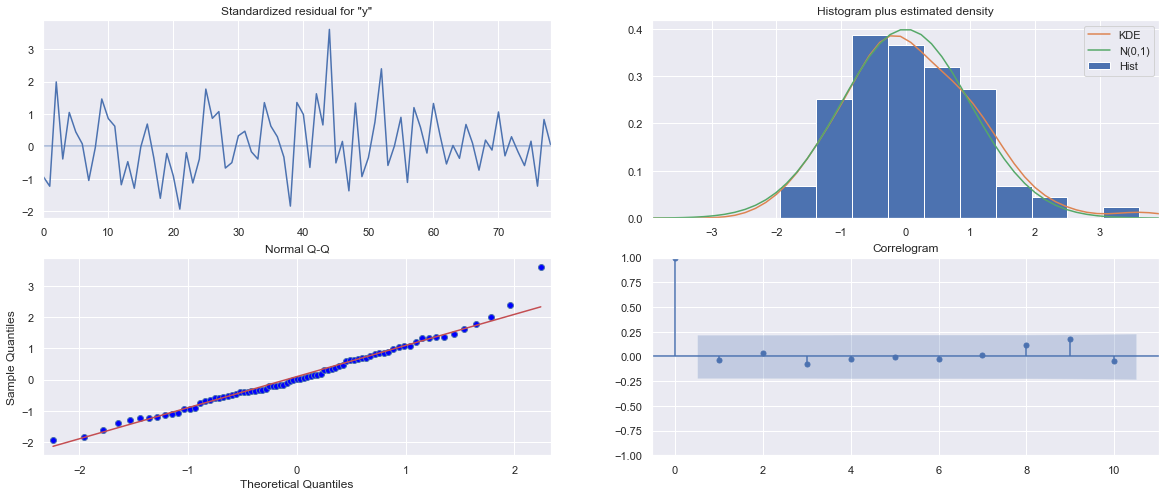

In [65]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [66]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [67]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,42.404655,14.360756,14.258090,70.551221
1,60.206734,14.494638,31.797765,88.615703
2,67.139424,14.494996,38.729754,95.549094
3,63.774544,14.563087,35.231418,92.317669
4,66.918365,14.548781,38.403279,95.433452


In [68]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

15.697187439876716


In [69]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,3)(1,1,3,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,3)",36.837007
"ARIMA(4,1,2)",37.061202
"SARIMA(1,1,3)(1,1,3,12)",15.697187


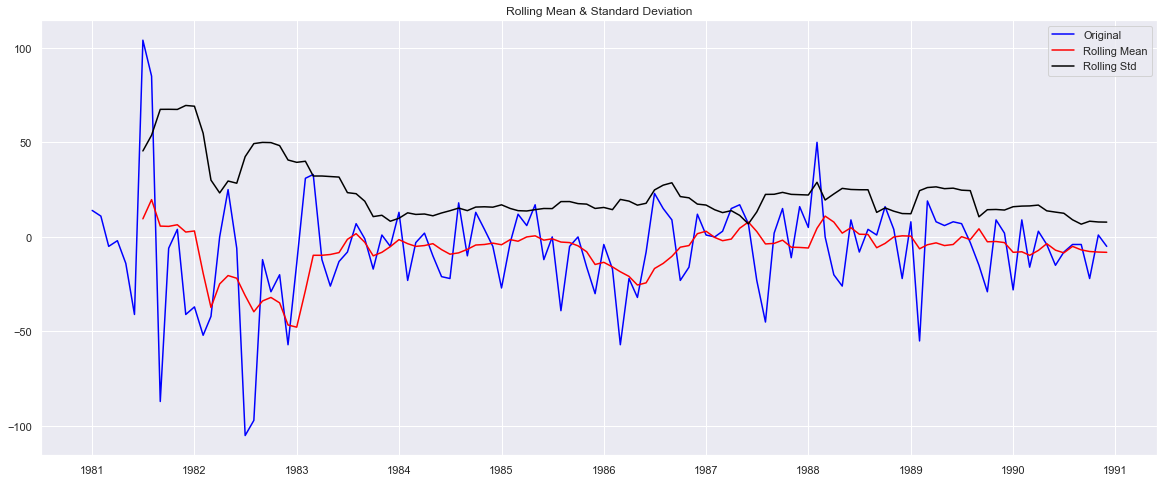

Results of Dickey-Fuller Test:
Test Statistic                  -3.619482
p-value                          0.005399
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [70]:
test_stationarity((train['Rose'].diff(12).dropna())) #D=0

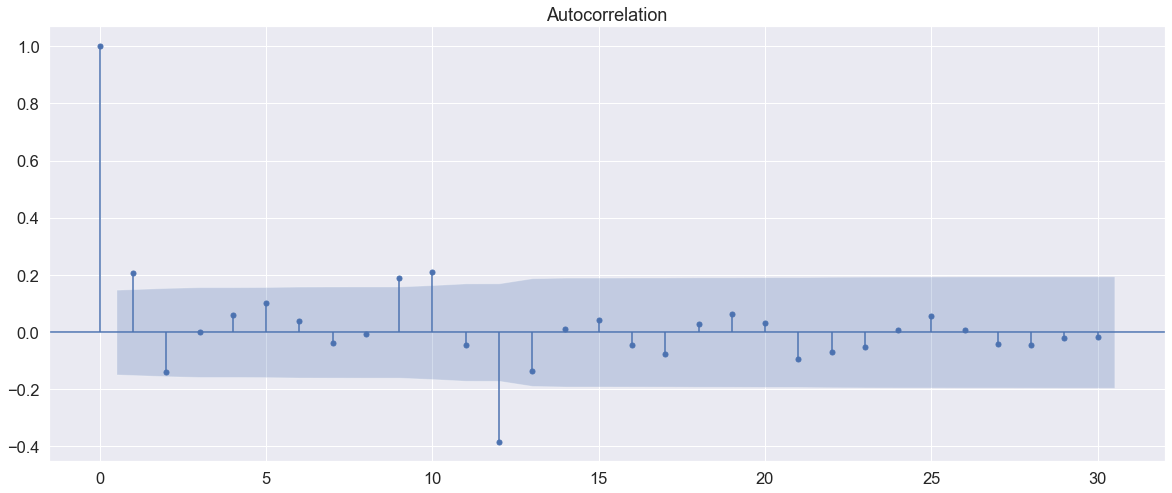

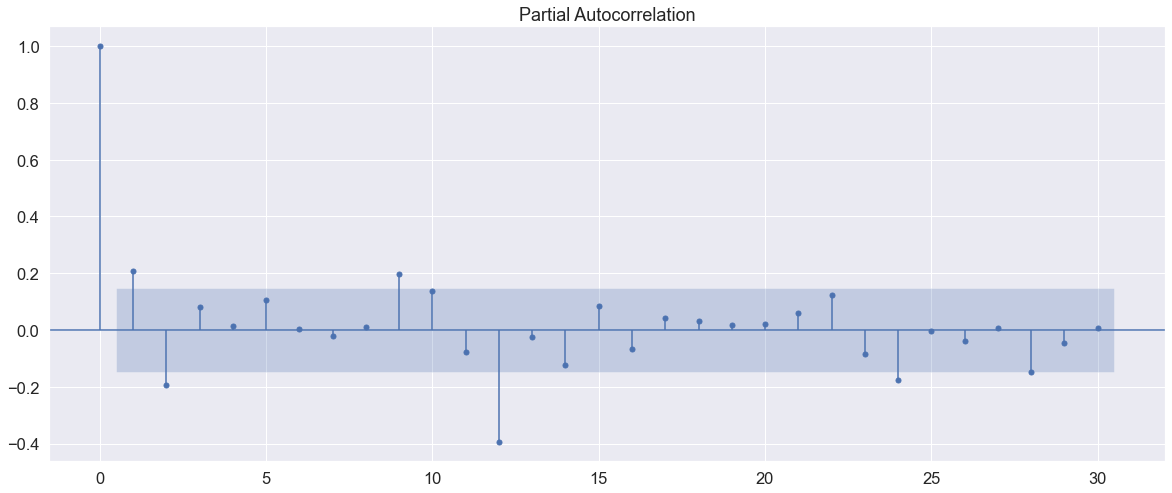

In [72]:
#D=0
sns.set(font_scale=1.5)
plot_acf((df['Rose'].diff(12).dropna()),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()),lags=30);
sns.set(font_scale=1.0)

In [73]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(2, 0, [1], 12)   Log Likelihood                -430.931
Date:                              Sun, 09 Jan 2022   AIC                            881.862
Time:                                      09:22:27   BIC                            908.210
Sample:                                           0   HQIC                           892.534
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7465      0.297     -2.517      0.012      -1.328      -0.165
ar.L2          0.02

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


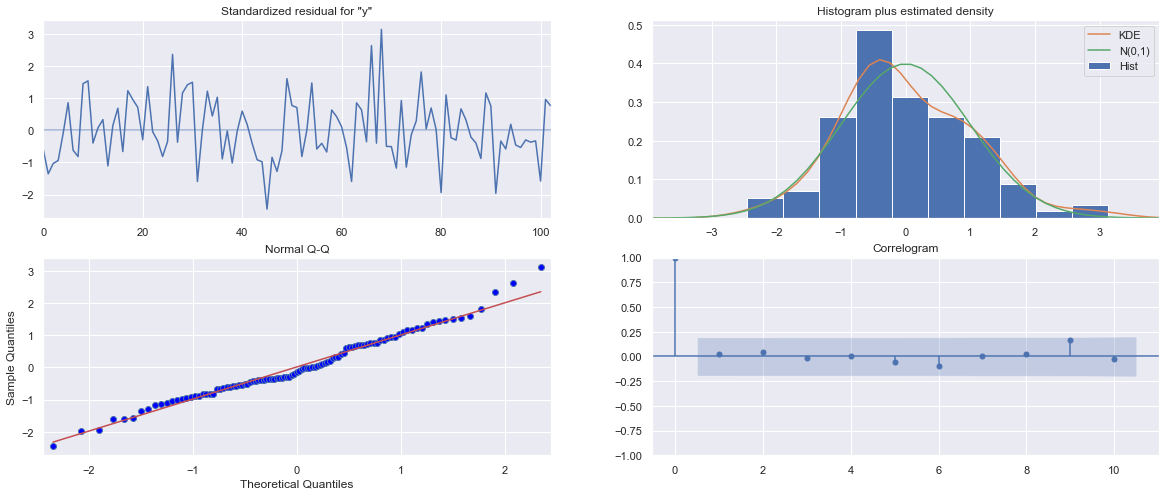

In [74]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [75]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [76]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.030629,15.642337,31.372212,92.689046
1,69.142443,15.790747,38.193148,100.091739
2,76.646220,15.822613,45.634467,107.657972
3,77.846476,15.822579,46.834791,108.858160
4,73.041909,15.842343,41.991487,104.092330


In [77]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

28.09986286547084


In [78]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(2,0,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,3)",36.837007
"ARIMA(4,1,2)",37.061202
"SARIMA(1,1,3)(1,1,3,12)",15.697187
"SARIMA(4,1,2)(2,0,1,12)",28.099863
